<a href="https://colab.research.google.com/github/aditichadha/Machine-Learning/blob/main/Kmeans_and_Hierarchial_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Analysis**

#### **Objective**: The objective of project 1 is to implement different clustering methods to synthetic and real-world data and validate using external and internal validation techniques

Datasets 1-8 contain the data points and their respective class information.
For each of the datasets follow the below steps
1. Use K-means and hierarchical clustering methods to generate clusters
2. Evaluate the performance of the clustering algorithm using external validation
metrics
3. Plot (2D or 3D) the data points for each dataset and color them according to the
original class
4. Plot (2D or 3D) the data points for each dataset and color them according to the
class allocated by the clustering algorithm

# **Task 1**

In [1]:
!pip install validclust

#### importing necessary *libraries*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import math as mt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import pairwise_distances
from validclust import dunn

## **Dataset 1**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv


In [8]:
data1 = pd.read_csv('Data1.csv')
data1.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column

In [9]:
data1.drop(columns = {'Unnamed: 0'}, inplace= True)
data1.head()

,X1,X2,X3,Class
0,-0.063274,0.027734,0.022683,1
1,-0.000731,0.048211,0.069198,1
2,-0.060767,-0.009080,0.053085,1
3,0.013252,-0.011876,0.055324,1
4,-0.054508,-0.003813,0.001738,1


In [10]:
data1.isnull().sum()

X1       0
X2       0
X3       0
Class    0
dtype: int64

Making a copy of data1 to be used kmeans and hierarchial clustering

In [11]:
dataset1_kmeans = data1.copy()
dataset1_hierarchial = data1.copy()

### **Task 1 Part (I). Use K-means and hierarchical clustering methods to generate clusters**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

#### **K Means Clustering**

In [12]:
k_data1 = data1['Class'].nunique()
k_data1

7

In [13]:
# Fiting K means clustering algorithm on given value of k
data1_kmeans = KMeans(n_clusters=k_data1,random_state = 42)
data1_kmeans.fit(dataset1_kmeans.iloc[:,0:3])
dataset1_kmeans['Predicted Class']= data1_kmeans.fit_predict(dataset1_kmeans.iloc[:,0:3])
#print(dataset1_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**'s categories

In [14]:
groups_1 = dataset1_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_1

Class  Predicted Class
1      4                  32
2      6                  30
3      3                  30
4      0                  30
5      2                  30
6      1                  30
7      5                  30
Name: X1, dtype: int64

Here, the Predicted Class has 1:1 mapping with Class, so we can map the Predicted Class labels to Original Class

In [15]:
classes1_km = (dataset1_kmeans['Class'].unique()).tolist()
pred_class1_km= (dataset1_kmeans['Predicted Class'].unique()).tolist()
class_mapping_km = dict(zip(pred_class1_km,classes1_km))
class_mapping_km

{4: 1, 6: 2, 3: 3, 0: 4, 2: 5, 1: 6, 5: 7}

In [17]:
dataset1_kmeans['Mapped_predicted_Cluster'] = dataset1_kmeans['Predicted Class'].map(class_mapping_km)
dataset1_kmeans.head()

,X1,X2,X3,Class,Predicted Class,Mapped_predicted_Cluster
0,-0.063274,0.027734,0.022683,1,4,1
1,-0.000731,0.048211,0.069198,1,4,1
2,-0.060767,-0.009080,0.053085,1,4,1
3,0.013252,-0.011876,0.055324,1,4,1
4,-0.054508,-0.003813,0.001738,1,4,1


In [18]:
data1_km_subset = dataset1_kmeans[['X1','X2','X3', 'Class','Mapped_predicted_Cluster']]
data1_km_subset.head()

,X1,X2,X3,Class,Mapped_predicted_Cluster
0,-0.063274,0.027734,0.022683,1,1
1,-0.000731,0.048211,0.069198,1,1
2,-0.060767,-0.009080,0.053085,1,1
3,0.013252,-0.011876,0.055324,1,1
4,-0.054508,-0.003813,0.001738,1,1


##### **External validation without mapping classes**

In [19]:
accuracy_without_map = metrics.accuracy_score(dataset1_kmeans.loc[:,'Class'],dataset1_kmeans.loc[:,'Predicted Class'])
f1_score_without_map = metrics.f1_score(dataset1_kmeans.loc[:,'Class'],dataset1_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy_without_map))
print("F1 score is {} without class mapping".format(f1_score_without_map))

Accuracy score is 0.14150943396226415 without class mapping
F1 score is 0.14150943396226415 without class mapping


Here the accuracy and F1 score is 0%. This does not mean that the algorithm is inefficient. It just signifies, that we cannot do external validation as the classes given by clustering algorithm are arbitrary.

##### **External validation with mapping classes**

In [20]:
accuracy = metrics.accuracy_score(dataset1_kmeans.loc[:,'Class'],dataset1_kmeans.loc[:,'Mapped_predicted_Cluster'])
f1_score = metrics.f1_score(dataset1_kmeans.loc[:,'Class'],dataset1_kmeans.loc[:,'Mapped_predicted_Cluster'], average = 'micro')

print("Accuracy score is {} by class mapping".format(accuracy))
print("F1 score is {} by class mapping".format(f1_score))

Accuracy score is 1.0 by class mapping
F1 score is 1.0 by class mapping


Kindly note that in this particular dataset, the Kmeans is able to exactly find similar clusters, hence we are able to map the clusters completely and successfully and this is the reason we have high accuracy -> 100% and high F1 score - 100%. However, had the clusters overlapped across the classes, we would not have been able to find the accuracy and f1 score.

##### **Task 1 (III) Plotting Dataset -1 Original Class**

In [21]:
cluster1_original_class = px.scatter_3d(dataset1_kmeans, x='X1', y='X2', z='X3', color='Class', width = 800, height = 500, title = 'Original Class')
cluster1_original_class.show()

##### **Task 1 (IV) Plotting Dataset -1 Predicted Class**

In [22]:
cluster1_predicted_class = px.scatter_3d(dataset1_kmeans, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                         title = 'Unmapped Predicted Class by Kmeans clustering algorithm : Dataset 1')
cluster1_predicted_class.show()


##### **Hierarchial clustering algorithm**

In [23]:
hierarchial_data1 = AgglomerativeClustering(n_clusters=k_data1, affinity='euclidean', linkage='ward')
dataset1_hierarchial['Predicted Class'] = hierarchial_data1.fit_predict(dataset1_hierarchial.iloc[:,0:3])
#print(dataset1_hierarchial.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 1**

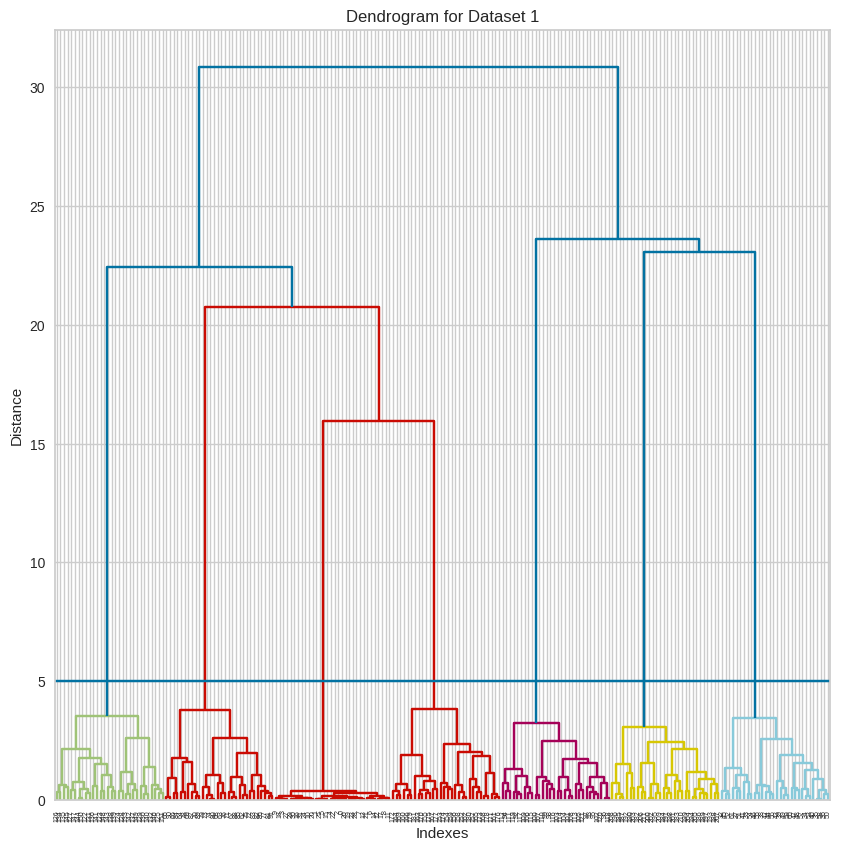

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Dendrogram for Dataset 1')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset1_hierarchial.iloc[:,0:3], method='ward'))
plt.axhline(y = 5, color = 'b', linestyle = '-')
plt.show()


**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 5 as to represent the number of clusters (7) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [25]:
groups_1_hc = dataset1_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_1_hc

Class  Predicted Class
1      6                  32
2      4                  30
3      2                  30
4      5                  30
5      1                  30
6      0                  30
7      3                  30
Name: X1, dtype: int64

In [26]:
classes1_hc = (dataset1_hierarchial['Class'].unique()).tolist()
pred_class1_hc= (dataset1_hierarchial['Predicted Class'].unique()).tolist()
class_mapping1_hc = dict(zip(pred_class1_hc,classes1_hc))
class_mapping1_hc

{6: 1, 4: 2, 2: 3, 5: 4, 1: 5, 0: 6, 3: 7}

In [27]:
dataset1_hierarchial['Mapped_predicted_Cluster'] = dataset1_hierarchial['Predicted Class'].map(class_mapping1_hc)
dataset1_hierarchial.head()

,X1,X2,X3,Class,Predicted Class,Mapped_predicted_Cluster
0,-0.063274,0.027734,0.022683,1,6,1
1,-0.000731,0.048211,0.069198,1,6,1
2,-0.060767,-0.009080,0.053085,1,6,1
3,0.013252,-0.011876,0.055324,1,6,1
4,-0.054508,-0.003813,0.001738,1,6,1


###### **External Validation** **in Hierarchial clustering**

**External Validation with Class mapping**




In [28]:
accuracy = metrics.accuracy_score(dataset1_hierarchial.loc[:,'Class'],dataset1_hierarchial.loc[:,'Mapped_predicted_Cluster'])
f1_score = metrics.f1_score(dataset1_hierarchial.loc[:,'Class'],dataset1_hierarchial.loc[:,'Mapped_predicted_Cluster'], average = 'micro')

print("Accuracy score is {}".format(accuracy))
print("F1 score is {}".format(f1_score))

Accuracy score is 1.0
F1 score is 1.0


Kindly note that here the accuracy and F1 score are 100%. This is very high because here we are able to map the classes completely. However, this may not be an ideal way to proceed if the predicted classes are overlapping in the original class

**External validation without class mapping**

In [29]:
accuracy_without_map_hc = metrics.accuracy_score(dataset1_hierarchial.loc[:,'Class'],dataset1_hierarchial.loc[:,'Predicted Class'])
f1_score_without_map_hc = metrics.f1_score(dataset1_hierarchial.loc[:,'Class'],dataset1_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy_without_map))
print("F1 score is {} without class mapping".format(f1_score_without_map))

Accuracy score is 0.14150943396226415 without class mapping
F1 score is 0.14150943396226415 without class mapping


Here the accuracy and F1 score is 0%. This does not mean that the algorithm is inefficient. It just signifies, that we cannot do external validation as the classes given by clustering algorithm are arbitrary.

###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 1**


In [30]:
cluster1_predicted_class_hc = px.scatter_3d(dataset1_hierarchial, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 1')
cluster1_predicted_class_hc.show()

#### **Dataset 2**

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Data2.csv to Data2.csv


In [32]:
data2 = pd.read_csv('Data2.csv')
data2.head()

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column

In [33]:
data2.drop(columns = {'Unnamed: 0'}, inplace= True)
data2.head()

,X,Y,C,Class
0,3.277701,0.814082,0.326574,1
1,0.387577,0.176780,0.888046,1
2,0.268546,0.582963,0.080981,1
3,2.031145,0.244597,0.643921,1
4,0.188677,0.461280,0.496633,1


Making a copy of data2 to be used kmeans and hierarchial clustering

In [34]:
data2.isnull().sum()

X        0
Y        0
C        0
Class    0
dtype: int64

In [35]:
dataset2_kmeans = data2.copy()
dataset2_hierarchial = data2.copy()

###  Task 1 (I) **K means method for clustering**




Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters



In [36]:
k_data2 = data2['Class'].nunique()
k_data2

4

In [37]:
# Fiiting K means clustering algorithm on given value of k
data2_kmeans = KMeans(n_clusters=k_data2
                      ,random_state = 42
                      )
data2_kmeans.fit(dataset2_kmeans.iloc[:,0:3])
dataset2_kmeans['Predicted Class']= data2_kmeans.fit_predict(dataset2_kmeans.iloc[:,0:3])
#print(dataset2_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories


In [38]:
groups_2_km = dataset2_kmeans.groupby(['Class','Predicted Class'])['X'].count()
groups_2_km

Class  Predicted Class
1      0                  117
       2                   83
2      0                   24
       3                   76
3      1                  100
4      3                    4
Name: X, dtype: int64

Here, the Predicted Class has 1:2 mapping with Class, so we can not map the Predicted Class labels to Original Class.

Hence , External validation would **not** be an efficient way to check how good is the clustering algorithm

#### **Task 1 (II) External validation for Kmeans**

In [39]:
accuracy = metrics.accuracy_score(dataset2_kmeans.loc[:,'Class'],dataset2_kmeans.loc[:,'Predicted Class'])
f1_score = metrics.f1_score(dataset2_kmeans.loc[:,'Class'],dataset2_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {}".format(accuracy))
print("F1 score is {}".format(f1_score))

Accuracy score is 0.0
F1 score is 0.0


**Note**: Since we cannot perform external validation, the metrics calculated do not have any meaning or significance here.

##### Task 1 (III) Plotting Dataset -2 Original Class

In [40]:
cluster2_original_class = px.scatter_3d(dataset2_kmeans, x='X', y='Y', z='C', color='Class', width = 800, height = 500, title = 'Plotting "Original Class" for Dataset 2')
cluster2_original_class.show()

##### Task 1 (IV) Plotting Dataset -2 Predicted Class (Unmapped)

In [41]:
cluster2_predicted_class = px.scatter_3d(dataset2_kmeans, x='X', y='Y', z='C', color='Predicted Class', width = 800, height = 500,
                                         title = 'Unmapped Predicted Class by Kmeans clustering algorithm : Dataset 2')
cluster2_predicted_class.show()


##### **Hierarchial clustering algorithm**

In [42]:
hierarchial_data2 = AgglomerativeClustering(n_clusters=k_data2, affinity='euclidean', linkage='ward')
dataset2_hierarchial['Predicted Class'] = hierarchial_data2.fit_predict(dataset2_hierarchial.iloc[:,0:3])
#print(dataset2_hierarchial.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 2**

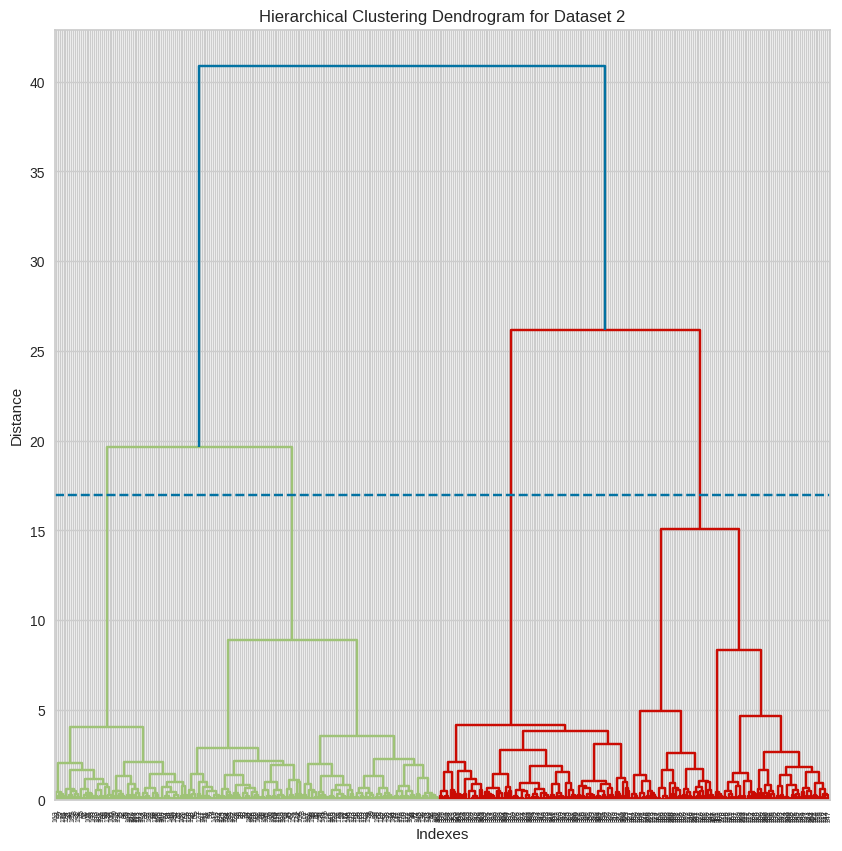

In [43]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 2')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset2_hierarchial.iloc[:,0:3], method='ward'))
plt.axhline(y = 17, color = 'b', linestyle = '--')
plt.show()

**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 17 as to represent the number of clusters (4) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [44]:
groups_2_hc = dataset2_hierarchial.groupby(['Class','Predicted Class'])['X'].count()
groups_2_hc

Class  Predicted Class
1      1                  131
       3                   69
2      0                  100
3      2                  100
4      0                    4
Name: X, dtype: int64

Here, since we donot have 1:1 mapping for classes with the predicted class, we cannot do mapping of the predicted class

Here note that we cannot perform external validation as the clustering algorithm gives an arbitrary value as class labels for the predicted class. Since we cannot map thre predicted class to original class in this case (because there is no 1:1 mapping), we would not be able to evaluate accuracy or f1 score accurately.

##### External Validation for  Hierarchial Clustering

In [45]:
accuracy2_without_map_hc = metrics.accuracy_score(dataset2_hierarchial.loc[:,'Class'],dataset2_hierarchial.loc[:,'Predicted Class'])
f1_score2_without_map_hc = metrics.f1_score(dataset2_hierarchial.loc[:,'Class'],dataset2_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy2_without_map_hc))
print("F1 score is {} without class mapping".format(f1_score2_without_map_hc))

Accuracy score is 0.32425742574257427 without class mapping
F1 score is 0.32425742574257427 without class mapping


###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 2**

In [46]:
cluster2_predicted_class_hc = px.scatter_3d(dataset2_hierarchial, x='X', y='Y', z='C', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 2')
cluster2_predicted_class_hc.show()

#### **Dataset 3**

In [47]:
from google.colab import files
uploaded = files.upload()

Saving Data3.csv to Data3.csv


In [48]:
data3 = pd.read_csv('Data3.csv')
data3.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



In [49]:
data3.drop(columns = {'Unnamed: 0'}, inplace= True)
data3.head()

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,1
1,1.409178,-0.035191,-0.251980,1
2,1.096803,0.246365,-0.415011,1
3,1.463328,0.265354,-0.513488,1
4,1.603284,0.080577,-0.470257,1


Making a copy of data3 to be used kmeans and hierarchial clustering

In [53]:
dataset3_kmeans = data3.copy()
dataset3_hierarchial = data3.copy()

##### **K means method for clustering**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

In [57]:
k_data3 = data3['Class'].nunique()
k_data3

4

In [58]:
# Fiiting K means clustering algorithm on given value of k
data3_kmeans = KMeans(n_clusters=k_data3,random_state = 42)
data3_kmeans.fit(dataset3_kmeans.iloc[:,0:3])
dataset3_kmeans['Predicted Class']= data3_kmeans.fit_predict(dataset3_kmeans.iloc[:,0:3])
#print(dataset3_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [59]:
groups_3 = dataset3_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_3

Class  Predicted Class
1      3                  100
2      0                  100
3      2                  100
4      1                  100
Name: X1, dtype: int64

[Here, the Predicted Class has 1:1 mapping with Class, so we can map the Predicted Class labels to Original Class

In [60]:
classes3_km = (dataset3_kmeans['Class'].unique()).tolist()
pred_class3_km= (dataset3_kmeans['Predicted Class'].unique()).tolist()
class3_mapping_km = dict(zip(pred_class3_km,classes3_km))
class3_mapping_km

{3: 1, 0: 2, 2: 3, 1: 4}

In [61]:
dataset3_kmeans['Mapped_predicted_Cluster'] = dataset3_kmeans['Predicted Class'].map(class3_mapping_km)
dataset3_kmeans.head()

,X1,X2,X3,Class,Predicted Class,Mapped_predicted_Cluster
0,1.295428,0.050829,-0.385217,1,3,1
1,1.409178,-0.035191,-0.251980,1,3,1
2,1.096803,0.246365,-0.415011,1,3,1
3,1.463328,0.265354,-0.513488,1,3,1
4,1.603284,0.080577,-0.470257,1,3,1


Checking external validation metrics:

###### External validation without mapping classes

In [62]:
accuracy3_without_map = metrics.accuracy_score(dataset3_kmeans.loc[:,'Class'],dataset3_kmeans.loc[:,'Predicted Class'])
f1_score3_without_map = metrics.f1_score(dataset3_kmeans.loc[:,'Class'],dataset3_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy3_without_map))
print("F1 score is {} without class mapping".format(f1_score3_without_map))

Accuracy score is 0.0 without class mapping
F1 score is 0.0 without class mapping


Here the accuracy and F1 score is 0%. This does not mean that the algorithm is inefficient. It just signifies, that we cannot do external validation as the classes given by clustering algorithm are arbitrary.

###### External validation with mapping classes

In [63]:
accuracy3_map = metrics.accuracy_score(dataset3_kmeans.loc[:,'Class'],dataset3_kmeans.loc[:,'Mapped_predicted_Cluster'])
f1_score3_map = metrics.f1_score(dataset3_kmeans.loc[:,'Class'],dataset3_kmeans.loc[:,'Mapped_predicted_Cluster'], average = 'micro')

print("Accuracy score is {} by class mapping".format(accuracy3_map))
print("F1 score is {} by class mapping".format(f1_score3_map))

Accuracy score is 1.0 by class mapping
F1 score is 1.0 by class mapping


Kindly note that in this particular dataset, the Kmeans is able to exactly find similar clusters, hence we are able to map the clusters completely and successfully and this is the reason we have high accuracy -> 100% and high F1 score - 100%. However, had the clusters overlapped across the classes, we would not have been able to find the accuracy and f1 score.

###### Plotting Dataset -3  Original Class

In [64]:
cluster3_original_class = px.scatter_3d(dataset3_kmeans, x='X1', y='X2', z='X3', color='Class', width = 800, height = 500,
                                        title = '3D Plot of the data points for Dataset 3 using Kmeans based on Original class')
cluster3_original_class.show()

###### Plotting Dataset - 3 Predicted Class (Unmapped)

In [65]:
cluster3_predicted_class = px.scatter_3d(dataset3_kmeans, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                         title = '3D Plot of the data points for Dataset 3 using Kmeans based on Unmapped predicted class')
cluster3_predicted_class.show()

##### **Hierarchial clustering algorithm**

In [66]:
hierarchial_data3 = AgglomerativeClustering(n_clusters=k_data3, affinity='euclidean', linkage='ward')
dataset3_hierarchial['Predicted Class'] = hierarchial_data3.fit_predict(dataset3_hierarchial.iloc[:,0:3])
#print(dataset3_hierarchial.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



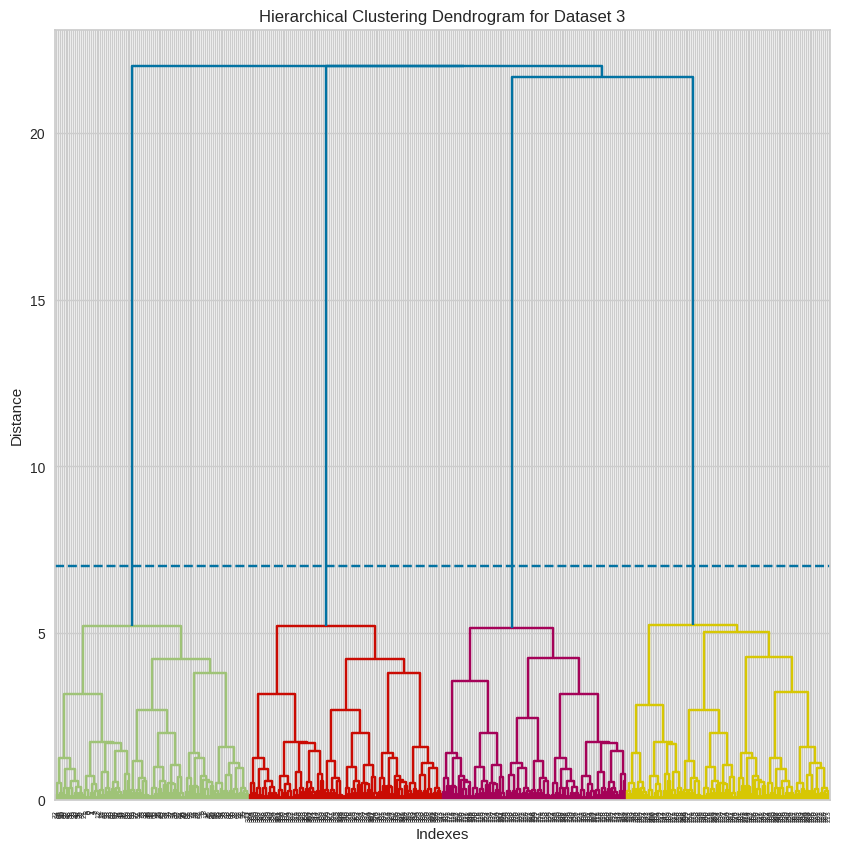

In [67]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 3')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset3_hierarchial.iloc[:,0:3], method='ward'))
plt.axhline(y = 7, color = 'b', linestyle = '--')
plt.show()

**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 7 as to represent the number of clusters (4) that would be formed.

**Class mapping**

In [68]:
groups_3_hc = dataset3_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_3_hc

Class  Predicted Class
1      1                  100
2      0                    5
       3                   95
3      0                  100
4      2                  100
Name: X1, dtype: int64

Here, since we donot have 1:1 mapping for classes with the predicted class, we cannot do mapping of the predicted class

In [69]:
accuracy3_map = metrics.accuracy_score(dataset3_hierarchial.loc[:,'Class'],dataset3_hierarchial.loc[:,'Predicted Class'])
f1_score3_map = metrics.f1_score(dataset3_hierarchial.loc[:,'Class'],dataset3_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy3_map))
print("F1 score is {} without class mapping".format(f1_score3_map))

Accuracy score is 0.25 without class mapping
F1 score is 0.25 without class mapping


Here note that we cannot perform external validation as the clustering algorithm gives an arbitrary value as class labels for the predicted class. Since we cannot map thre predicted class to original class in this case (because there is no 1:1 mapping), we would not be able to evaluate accuracy or f1 score accurately.

###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 3**

In [70]:
cluster3_predicted_class_hc = px.scatter_3d(dataset3_hierarchial, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 3')
cluster3_predicted_class_hc.show()

#### **Dataset 4**

In [71]:
from google.colab import files
uploaded = files.upload()

Saving Data4.csv to Data4.csv


In [72]:
data4 = pd.read_csv('Data4.csv')
data4.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.4530,-0.891,0.02300,1
1,2,0.6530,-0.846,0.02110,1
2,3,0.3980,0.913,-0.00139,1
3,4,0.0952,1.050,0.00628,1
4,5,0.5240,-0.941,0.03780,1


Checking if the dataset has missing or NaN values

In [73]:
data4.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [74]:
data4.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [75]:
data4.drop(columns = {'Unnamed: 0'}, inplace= True)
data4.head()

,X1,X2,X3,Class
0,-0.4530,-0.891,0.02300,1
1,0.6530,-0.846,0.02110,1
2,0.3980,0.913,-0.00139,1
3,0.0952,1.050,0.00628,1
4,0.5240,-0.941,0.03780,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



Making a copy of data4 to be used kmeans and hierarchial clustering

In [76]:
dataset4_kmeans = data4.copy()
dataset4_hierarchial = data4.copy()

##### Task 1 (I) **K means method for clustering**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

In [77]:
k_data4 = data4['Class'].nunique()
k_data4

2

In [78]:
# Fiiting K means clustering algorithm on given value of k
data4_kmeans = KMeans(n_clusters=k_data4,random_state = 42)
data4_kmeans.fit(dataset4_kmeans.iloc[:,0:3])
dataset4_kmeans['Predicted Class']= data4_kmeans.fit_predict(dataset4_kmeans.iloc[:,0:3])
#print(dataset4_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [79]:
groups_4 = dataset4_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_4

Class  Predicted Class
1      0                  327
       1                  173
2      0                  174
       1                  326
Name: X1, dtype: int64

Here, the Predicted Class **does not have** 1:1 mapping with Class, so we cannot map the Predicted Class labels to Original Class. Therefore, we cannot perform External validation

In [80]:
accuracy4_without_map = metrics.accuracy_score(dataset4_kmeans.loc[:,'Class'],dataset4_kmeans.loc[:,'Predicted Class'])
f1_score4_without_map = metrics.f1_score(dataset4_kmeans.loc[:,'Class'],dataset4_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy4_without_map))
print("F1 score is {} without class mapping".format(f1_score4_without_map))

Accuracy score is 0.173 without class mapping
F1 score is 0.173 without class mapping


###### Plotting Dataset -4 Original Class

In [81]:
cluster4_original_class = px.scatter_3d(dataset4_kmeans, x='X1', y='X2', z='X3', color='Class', width = 800, height = 500, title = 'Original Class')
cluster4_original_class.show()

###### Plotting Dataset -4 Predicted Class (Unmapped)

In [82]:
cluster4_predicted_class_km = px.scatter_3d(dataset4_kmeans, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                         title = 'Unmapped Predicted Class by Kmeans clustering algorithm : Dataset 4')
cluster4_predicted_class_km.show()

##### **Hierarchial clustering algorithm**

In [84]:
hierarchial_data4 = AgglomerativeClustering(n_clusters=k_data4, affinity='euclidean', linkage='ward')
dataset4_hierarchial['Predicted Class'] = hierarchial_data4.fit_predict(dataset4_hierarchial.iloc[:,0:3])
#print(dataset4_hierarchial.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 4**

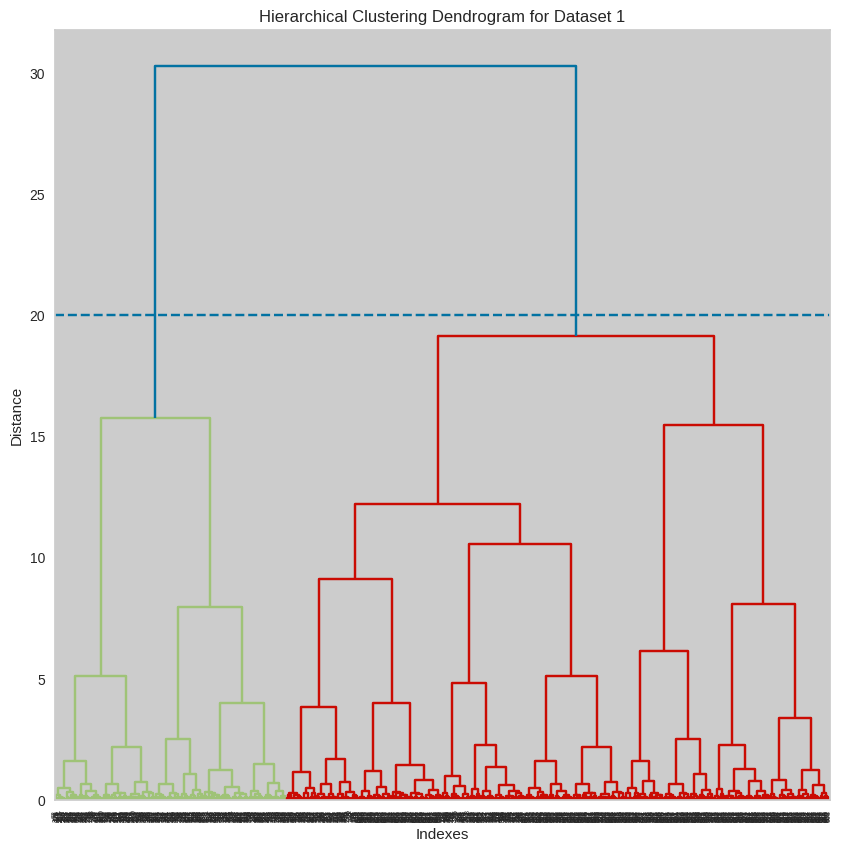

In [85]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 1')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset4_hierarchial.iloc[:,0:3], method='ward'))
plt.axhline(y = 20, color = 'b', linestyle = '--')
plt.show()

**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 20 as to represent the number of clusters (2) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [86]:
groups_4_hc = dataset4_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_4_hc

Class  Predicted Class
1      0                  201
       1                  299
2      0                  500
Name: X1, dtype: int64

Here, since we donot have 1:1 mapping for classes with the predicted class, we cannot do mapping of the predicted class




Here note that we cannot perform external validation as the clustering algorithm gives an arbitrary value as class labels for the predicted class. Since we cannot map the predicted class to original class in this case (because there is no 1:1 mapping), we would not be able to evaluate accuracy or f1 score accurately.

###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 4**

In [87]:
cluster4_predicted_class_hc = px.scatter_3d(dataset4_hierarchial, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 4')
cluster4_predicted_class_hc.show()

#### **Dataset 5**

In [88]:
from google.colab import files
uploaded = files.upload()

Saving Data5.csv to Data5.csv


In [93]:
data5 = pd.read_csv('Data5.csv')
data5.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1


In [94]:
data5.drop(columns = {'Unnamed: 0'}, inplace= True)
data5.head()

,X1,X2,X3,Class
0,-4.822490,-50.402170,4.020861,1
1,-44.460120,20.964670,-11.492060,1
2,50.001020,0.780748,9.134460,1
3,-41.699080,-22.310060,16.314120,1
4,4.425242,-4.666664,50.223740,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



In [95]:
data5.isnull().sum()

X1       0
X2       0
X3       0
Class    0
dtype: int64

In [96]:
data5.isna().sum()

X1       0
X2       0
X3       0
Class    0
dtype: int64

Making a copy of data1 to be used kmeans and hierarchial clustering

In [97]:
dataset5_kmeans = data5.copy()
dataset5_hierarchial = data5.copy()

#####  Task 1 (I) **K means method for clustering**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

In [98]:
k_data5 = data5['Class'].nunique()
k_data5

2

In [99]:
# Fiiting K means clustering algorithm on given value of k
data5_kmeans = KMeans(n_clusters=k_data5,random_state = 42)
data5_kmeans.fit(dataset5_kmeans.iloc[:,0:3])
dataset5_kmeans['Predicted Class']= data5_kmeans.fit_predict(dataset5_kmeans.iloc[:,0:3])
#print(dataset5_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



###### External Validation

In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [100]:
groups_5 = dataset5_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_5

Class  Predicted Class
1      0                  226
       1                  174
2      0                  400
Name: X1, dtype: int64

Here, the Predicted Class does not have 1:1 mapping with Class, so we cannot map the Predicted Class labels to Original Class

Here note that we cannot perform external validation as the clustering algorithm gives an arbitrary value as class labels for the predicted class. Since we cannot map the predicted class to original class in this case (because there is no 1:1 mapping), we would not be able to evaluate accuracy or f1 score accurately.

In [101]:
accuracy5_without_map = metrics.accuracy_score(dataset5_kmeans.loc[:,'Class'],dataset5_kmeans.loc[:,'Predicted Class'])
f1_score5_without_map = metrics.f1_score(dataset5_kmeans.loc[:,'Class'],dataset5_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy5_without_map))
print("F1 score is {} without class mapping".format(f1_score5_without_map))

Accuracy score is 0.2175 without class mapping
F1 score is 0.2175 without class mapping


###### Plotting Dataset 5 with Original Class

In [102]:
cluster5_original_class = px.scatter_3d(dataset5_kmeans, x='X1', y='X2', z='X3', color='Class', width = 800, height = 500, title = '3D plot of datapoints w.r.t. Original class - Dataset 5')
cluster5_original_class.show()

###### Plotting Dataset- 5 Predicted Class (Unmapped)

In [103]:
cluster5_predicted_class = px.scatter_3d(dataset5_kmeans, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                         title = 'Unmapped Predicted Class by Kmeans clustering algorithm : Dataset 5')
cluster5_predicted_class.show()

##### **Hierarchial clustering algorithm**

In [104]:
hierarchial_data5 = AgglomerativeClustering(n_clusters=k_data5, affinity='euclidean', linkage='ward')
dataset5_hierarchial['Predicted Class'] = hierarchial_data5.fit_predict(dataset5_hierarchial.iloc[:,0:3])
#print(dataset5_hierarchial.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 5**

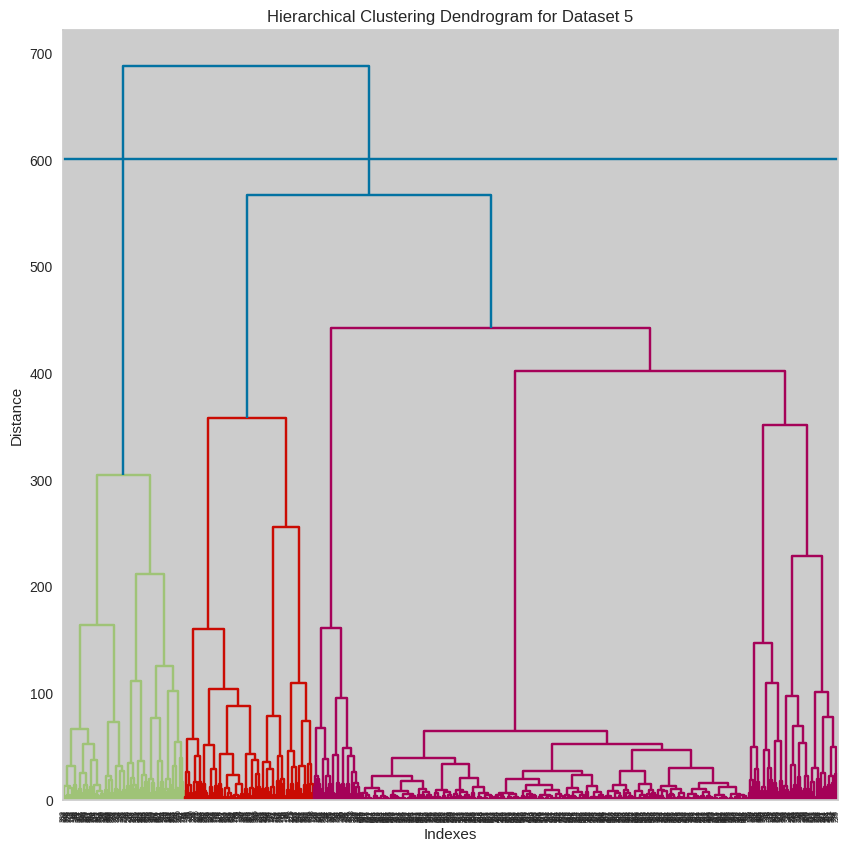

In [105]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 5')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset5_hierarchial.iloc[:,0:3], method='ward'))
plt.axhline(y = 600, color = 'b', linestyle = '-')
plt.show()

**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 5 as to represent the number of clusters (2) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [106]:
groups_5_hc = dataset5_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_5_hc

Class  Predicted Class
1      0                  274
       1                  126
2      0                  400
Name: X1, dtype: int64

Here, since we donot have 1:1 mapping for classes with the predicted class, we cannot do mapping of the predicted class. Hence, we would not be able to proceed with external validation and we would not be able to evaluate accuracy or f1 score accurately.


##### External Validation for Hierachial Clustering

In [107]:
accuracy5_without_map_hc = metrics.accuracy_score(dataset5_hierarchial.loc[:,'Class'],dataset5_hierarchial.loc[:,'Predicted Class'])
f1_score5_without_map_hc = metrics.f1_score(dataset5_hierarchial.loc[:,'Class'],dataset5_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy5_without_map_hc))
print("F1 score is {} without class mapping".format(f1_score5_without_map_hc))

Accuracy score is 0.1575 without class mapping
F1 score is 0.1575 without class mapping


###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 5**

In [108]:
cluster5_predicted_class_hc = px.scatter_3d(dataset5_hierarchial, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 5')
cluster5_predicted_class_hc.show()

#### **Dataset 6**

In [109]:
from google.colab import files
uploaded = files.upload()

Saving Data6.csv to Data6.csv


In [111]:
data6 = pd.read_csv('Data6.csv')
data6.head()

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,1
1,2,2.177247,3.102304,1
2,3,0.378645,5.307610,1
3,4,3.681732,1.622681,1
4,5,2.462861,2.777897,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



In [112]:
data6.drop(columns = {'Unnamed: 0'}, inplace= True)
data6.head()

,X1,X2,Class
0,1.388261,2.076096,1
1,2.177247,3.102304,1
2,0.378645,5.307610,1
3,3.681732,1.622681,1
4,2.462861,2.777897,1


Checking for Null or Nan values in the dataset

In [113]:
data6.isnull().sum()

X1       0
X2       0
Class    0
dtype: int64

In [114]:
data6.isna().sum()

X1       0
X2       0
Class    0
dtype: int64

Making a copy of data1 to be used kmeans and hierarchial clustering

In [115]:
dataset6_kmeans = data6.copy()
dataset6_hierarchial = data6.copy()

##### **K means method for clustering**

In [116]:
k_data6 = data6['Class'].nunique()
k_data6

2

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

##### Task 1 (1) Kmeans clustering for Dataset 6

In [118]:
# Fiiting K means clustering algorithm on given value of k
data6_kmeans = KMeans(n_clusters=k_data6,random_state = 42)
data6_kmeans.fit(dataset6_kmeans.iloc[:,0:2])
dataset6_kmeans['Predicted Class']= data6_kmeans.fit_predict(dataset6_kmeans.iloc[:,0:3])
#print(dataset6_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [119]:
groups_6_km = dataset6_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_6_km

Class  Predicted Class
1      0                  2024
       1                    24
2      0                   114
       1                  1934
Name: X1, dtype: int64

Here, the Predicted Class does not have 1:1 mapping with Class, so we can not map the Predicted Class labels to Original Class


**External validation**

###### External validation without mapping classes

Here, We donot have 1:1 mapping for classes with the predicted class. Hence, we would not be able to proceed with external validation and we would not be able to evaluate accuracy or f1 score accurately.

In [120]:
accuracy6_without_map_km = metrics.accuracy_score(dataset6_kmeans.loc[:,'Class'],dataset6_kmeans.loc[:,'Predicted Class'])
f1_score6_without_map_km = metrics.f1_score(dataset6_kmeans.loc[:,'Class'],dataset6_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy6_without_map_km))
print("F1 score is {} without class mapping".format(f1_score6_without_map_km))

Accuracy score is 0.005859375 without class mapping
F1 score is 0.005859375 without class mapping


###### Plotting Dataset -6 Original Class

In [121]:
cluster6_original_class = px.scatter(dataset6_kmeans, x='X1', y='X2', color='Class', width = 800, height = 500, title = '2D plot for datapoints w.r.t Original Class')
cluster6_original_class.show()

###### Plotting Dataset -6 Predicted Class (Unmapped)

In [122]:
cluster6_predicted_class = px.scatter(dataset6_kmeans, x='X1', y='X2', color='Predicted Class', width = 800, height = 500,
                                      title = '2D plot for datapoints w.r.t Predicted Class for Kmeans algorithm')
cluster6_predicted_class.show()

##### **Hierarchial clustering algorithm**

In [123]:
hierarchial_data6 = AgglomerativeClustering(n_clusters=k_data6, affinity='euclidean', linkage='ward')
dataset6_hierarchial['Predicted Class'] = hierarchial_data6.fit_predict(dataset6_hierarchial.iloc[:,0:2])
#print(dataset6_hierarchial.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 6**

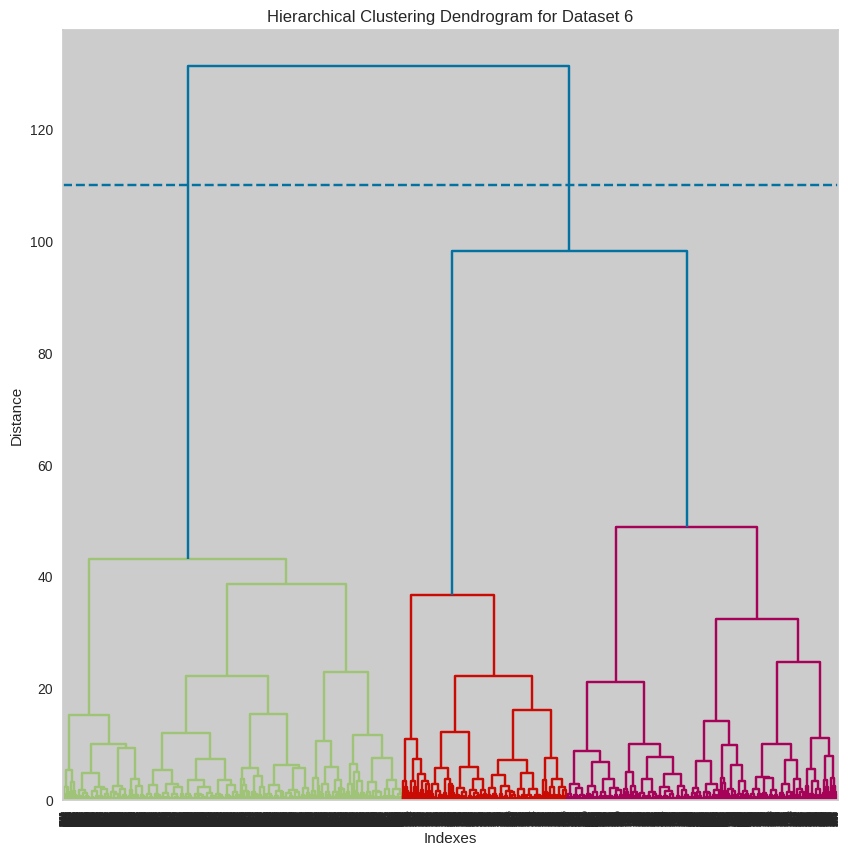

In [124]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 6')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset6_hierarchial.iloc[:,0:2], method='ward'))
plt.axhline(y = 110, color = 'b', linestyle = '--')
plt.show()


**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 110 as to represent the number of clusters (2) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [125]:
groups_6_hc = dataset6_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_6_hc

Class  Predicted Class
1      0                  2016
       1                    32
2      0                   280
       1                  1768
Name: X1, dtype: int64

###### External Validation for Hierarchial Clustering

Kinldy note that we cannot accurately compute the accuracy or f1 score measures as the mapping of the predicted class labels is aribitrary

In [126]:
accuracy6_hc = metrics.accuracy_score(dataset6_hierarchial.loc[:,'Class'],dataset6_hierarchial.loc[:,'Predicted Class'])
f1_score6_hc = metrics.f1_score(dataset6_hierarchial.loc[:,'Class'],dataset6_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {}".format(accuracy6_hc))
print("F1 score is {}".format(f1_score6_hc))

Accuracy score is 0.0078125
F1 score is 0.0078125


###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 6**

In [127]:
cluster6_predicted_class_hc = px.scatter(dataset6_hierarchial, x='X1', y='X2', color='Predicted Class', width = 800, height = 500,
                                      title = '2D plot for datapoints w.r.t Predicted Class for Hierarcial Clustering')
cluster6_predicted_class_hc.show()

#### **Dataset 7**

In [128]:
from google.colab import files
uploaded = files.upload()

Saving Data7.csv to Data7.csv


In [129]:
data7 = pd.read_csv('Data7.csv')
data7.head()

,Unnamed: 0,X1,X2,Class
0,1,-3.000000,-3.000000,5
1,2,-3.000000,3.000000,4
2,3,3.000000,-3.000000,6
3,4,3.000000,3.000000,3
4,5,-0.417091,0.114782,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



In [130]:
data7.drop(columns = {'Unnamed: 0'}, inplace= True)
data7.head()

,X1,X2,Class
0,-3.000000,-3.000000,5
1,-3.000000,3.000000,4
2,3.000000,-3.000000,6
3,3.000000,3.000000,3
4,-0.417091,0.114782,1


Checking for Null or NAn values in the dataset

In [131]:
data7.isnull().sum()

X1       0
X2       0
Class    0
dtype: int64

In [132]:
data7.isna().sum()

X1       0
X2       0
Class    0
dtype: int64

Making a copy of data1 to be used kmeans and hierarchial clustering

In [133]:
dataset7_kmeans = data7.copy()
dataset7_hierarchial = data7.copy()

##### **K means method for clustering**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

In [134]:
k_data7 = data7['Class'].nunique()
k_data7

6

In [135]:
# Fitting K means clustering algorithm on given value of k
data7_kmeans = KMeans(n_clusters=k_data7,random_state = 42)
data7_kmeans.fit(dataset7_kmeans.iloc[:,0:3])
dataset7_kmeans['Predicted Class']= data7_kmeans.fit_predict(dataset7_kmeans.iloc[:,0:3])
#print(dataset7_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [136]:
groups_7 = dataset7_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_7

Class  Predicted Class
1      1                  395
2      0                   89
       3                  101
       4                   81
       5                   92
3      4                    3
4      0                    3
5      5                    3
6      2                    3
Name: X1, dtype: int64

Kindly note that here, the Predicted Class cannot be 1:1 mapped with Original Class



Here, We donot have 1:1 mapping for classes with the predicted class. Hence, we would not be able to proceed with external validation and we would not be able to evaluate accuracy or f1 score accurately.


External Validation

In [137]:
accuracy7_without_map_km = metrics.accuracy_score(dataset7_kmeans.loc[:,'Class'],dataset7_kmeans.loc[:,'Predicted Class'])
f1_score7_without_map_km = metrics.f1_score(dataset7_kmeans.loc[:,'Class'],dataset7_kmeans.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy7_without_map_km))
print("F1 score is {} without class mapping".format(f1_score7_without_map_km))

Accuracy score is 0.5168831168831168 without class mapping
F1 score is 0.5168831168831168 without class mapping


###### Plotting Dataset - 7  Original Class

In [138]:
cluster7_original_class_km = px.scatter(dataset7_kmeans, x='X1', y='X2', color='Class', width = 800, height = 500,
                                      title = '2D plot for datapoints w.r.t Original Class')
cluster7_original_class_km.show()

###### Plotting Dataset -7 Predicted Class (Unmapped)

In [141]:
cluster7_predicted_class_km = px.scatter(dataset7_kmeans, x='X1', y='X2', color='Predicted Class', width = 800, height = 500,
                                      title = '2D plot for datapoints w.r.t Predicted Class by Kmeans Algorithm')
cluster7_predicted_class_km.show()

##### **Hierarchial clustering algorithm**

In [142]:
hierarchial_data7 = AgglomerativeClustering(n_clusters=k_data7, affinity='euclidean', linkage='ward')
dataset7_hierarchial['Predicted Class'] = hierarchial_data7.fit_predict(dataset7_hierarchial.iloc[:,0:2])
#print(dataset7_hierarchial.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 7**

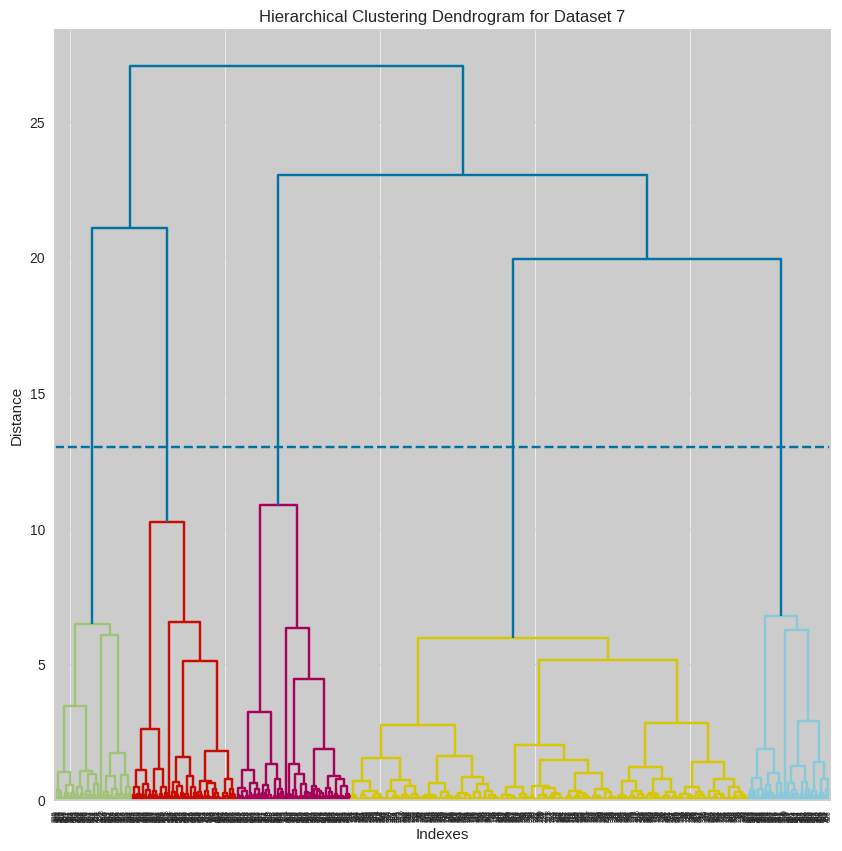

In [143]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 7')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset7_hierarchial.iloc[:,0:2], method='ward'))
plt.axhline(y = 13, color = 'b', linestyle = '--')
plt.show()

**Note**: This Dendrogram is for representational purposes. We have cut the dendrogram at distance = 5 as to represent the number of clusters (6) that would be formed.

**Class mapping**

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [144]:
groups_7_hc = dataset7_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_7_hc

Class  Predicted Class
1      4                  395
2      0                  101
       1                   74
       2                   78
       3                   63
       5                   47
3      1                    3
4      3                    3
5      2                    3
6      0                    3
Name: X1, dtype: int64

Here, We donot have 1:1 mapping for classes with the predicted class. Hence, we would not be able to evaluate accuracy or f1 score accurately.

#### External Validation for Kmeans Clustering (datset 7)

In [145]:
accuracy7_without_map_hc = metrics.accuracy_score(dataset7_hierarchial.loc[:,'Class'],dataset7_hierarchial.loc[:,'Predicted Class'])
f1_score7_without_map_hc = metrics.f1_score(dataset7_hierarchial.loc[:,'Class'],dataset7_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy7_without_map_hc))
print("F1 score is {} without class mapping".format(f1_score7_without_map_hc))

Accuracy score is 0.1012987012987013 without class mapping
F1 score is 0.1012987012987013 without class mapping


###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 7**

In [146]:
cluster7_predicted_class_hc = px.scatter(dataset7_hierarchial, x='X1', y='X2', color='Predicted Class', width = 800, height = 500,
                                      title = '2D plot for datapoints w.r.t Predicted Class by Hierarchial Clustering Algorithm')
cluster7_predicted_class_hc.show()

#### Dataset 8

In [147]:
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8.csv


In [148]:
data8 = pd.read_csv('Data8.csv')
data8.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1


Since 'Unnamed: 0' column is not necessary for our analysis, dropping the column



In [149]:
data8.drop(columns = {'Unnamed: 0'}, inplace= True)
data8.head()

,X1,X2,X3,Class
0,0.000000,0.000000,1.00000,1
1,0.000000,0.052336,0.99863,1
2,0.049774,0.016173,0.99863,1
3,0.030762,-0.042341,0.99863,1
4,-0.030762,-0.042341,0.99863,1


Checking for Null or NaN values

In [150]:
data8.isnull().sum()

X1       0
X2       0
X3       0
Class    0
dtype: int64

In [151]:
data8.isna().sum()

X1       0
X2       0
X3       0
Class    0
dtype: int64

Making a copy of data8 to be used kmeans and hierarchial clustering

In [152]:
dataset8_kmeans = data8.copy()
dataset8_hierarchial = data8.copy()

##### Task 1 (I) **K means method for clustering**

Since we are already given the number of clusters, we can directly use the number of clusters 'k' to make clusters

In [153]:
k_data8 = data8['Class'].nunique()
k_data8

1

In [154]:
# Fiiting K means clustering algorithm on given value of k
data8_kmeans = KMeans(n_clusters=k_data8,random_state = 42)
data8_kmeans.fit(dataset8_kmeans.iloc[:,0:3])
dataset8_kmeans['Predicted Class']= data8_kmeans.fit_predict(dataset8_kmeans.iloc[:,0:3])
#print(dataset8_kmeans.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In order to implement external validation, we need to have similar classes but  Kmeans can be considered as an unsupervised method of classifying or finding clusters. Since the Kmeans does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

Checking , if we can map the '**Predicted Class**' to Original Class , '**Class**''s categories

In [155]:
groups_8 = dataset8_kmeans.groupby(['Class','Predicted Class'])['X1'].count()
groups_8

Class  Predicted Class
1      0                  4002
Name: X1, dtype: int64

Here, the Predicted Class has 1:1 mapping with Class, so we can map the Predicted Class labels to Original Class


In [156]:
classes8_km = (dataset8_kmeans['Class'].unique()).tolist()
pred_class8_km= (dataset8_kmeans['Predicted Class'].unique()).tolist()
class8_mapping_km = dict(zip(pred_class8_km,classes8_km))
class8_mapping_km

{0: 1}

In [158]:
dataset8_kmeans['Mapped_predicted_Cluster'] = dataset8_kmeans['Predicted Class'].map(class8_mapping_km)
dataset8_kmeans.head()

,X1,X2,X3,Class,Predicted Class,Mapped_predicted_Cluster
0,0.000000,0.000000,1.00000,1,0,1
1,0.000000,0.052336,0.99863,1,0,1
2,0.049774,0.016173,0.99863,1,0,1
3,0.030762,-0.042341,0.99863,1,0,1
4,-0.030762,-0.042341,0.99863,1,0,1


Checking external validation metrics:

###### External validation

In [159]:
accuracy8 = metrics.accuracy_score(dataset8_kmeans.loc[:,'Class'],dataset8_kmeans.loc[:,'Mapped_predicted_Cluster'])
f1_score8 = metrics.f1_score(dataset8_kmeans.loc[:,'Class'],dataset8_kmeans.loc[:,'Mapped_predicted_Cluster'], average = 'micro')

print("Accuracy score is {} with class mapping".format(accuracy8))
print("F1 score is {} with class mapping".format(f1_score8))

Accuracy score is 1.0 with class mapping
F1 score is 1.0 with class mapping


Kindly note that in this particular dataset, the Kmeans is able to exactly find similar clusters, hence we are able to map the clusters completely and successfully and this is the reason we have high accuracy -> 100% and high F1 score - 100%. However, had the clusters overlapped across the classes, we would not have been able to find the accuracy and f1 score.

###### Plotting Dataset -8 Original Class

In [160]:
cluster8_original_class = px.scatter_3d(dataset8_kmeans, x='X1', y='X2', z='X3', color='Class', width = 800, height = 500,
                                        title = '3D plot of datapoints for dataset 8 w.r.t. Original Class')
cluster8_original_class.show()

In [161]:
cluster8_pred_class_km = px.scatter_3d(dataset8_kmeans, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                         title = 'Unmapped Predicted Class by Kmeans clustering algorithm : Dataset 8')
cluster8_pred_class_km.show()

##### **Hierarchial clustering algorithm**

In [163]:
hierarchial_data8 = AgglomerativeClustering(n_clusters=k_data8, affinity='euclidean', linkage='ward')
dataset8_hierarchial['Predicted Class'] = hierarchial_data8.fit_predict(dataset8_hierarchial.iloc[:,0:3])
#print(dataset8_hierarchial.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



###### **Plotting dendrogram for Dataset 8**

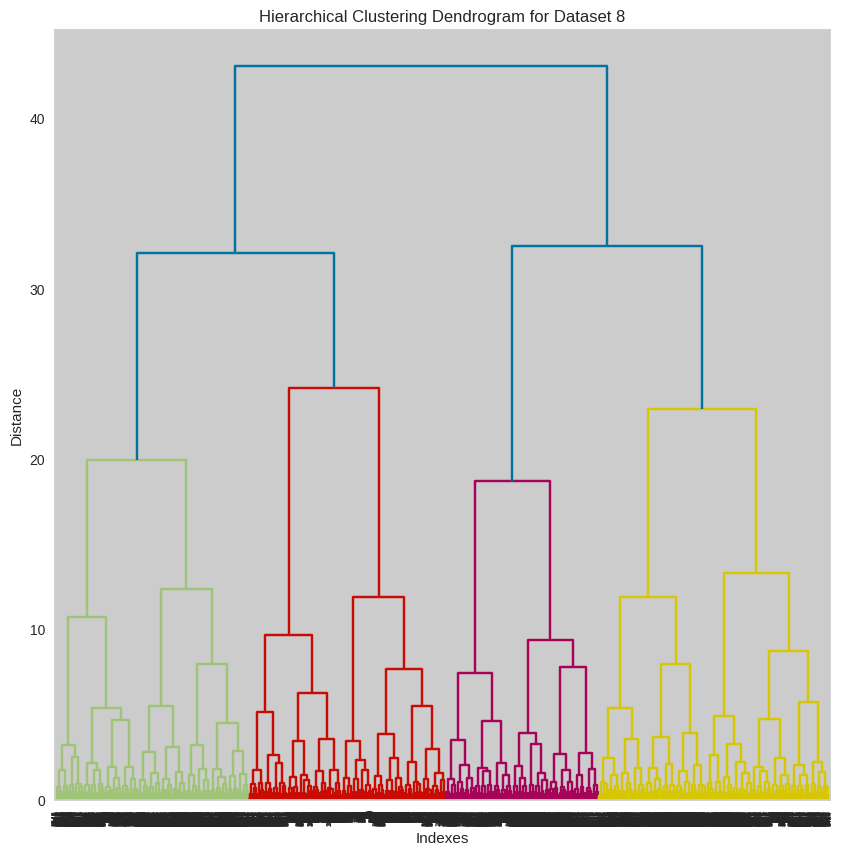

In [165]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for Dataset 8')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(dataset8_hierarchial.iloc[:,0:3], method='ward'))
#plt.axhline(y = 15, color = 'b', linestyle = '-')
plt.show()

**Note**: This Dendrogram is for representational purposes.

Class Mapping

In order to implement external validation, we need to have similar classes but  Hierarchial clusering (HC) can be considered as an unsupervised method of classifying or finding clusters. Since the HC does not have knowledge of original class, it will assign classes to similar records arbitrarily. Hence, we cannot evaluate the external validation successfully unless we are able to map the Predicted Classes to Original classes completely.

In [166]:
groups_8_hc = dataset8_hierarchial.groupby(['Class','Predicted Class'])['X1'].count()
groups_8_hc

Class  Predicted Class
1      0                  4002
Name: X1, dtype: int64

In [167]:
classes8_hc = (dataset8_hierarchial['Class'].unique()).tolist()
pred_class8_hc= (dataset8_hierarchial['Predicted Class'].unique()).tolist()
class_mapping8_hc = dict(zip(pred_class8_hc,classes8_hc))
class_mapping8_hc

{0: 1}

In [168]:
dataset8_hierarchial['Mapped_predicted_Cluster'] = dataset8_hierarchial['Predicted Class'].map(class_mapping8_hc)
dataset8_hierarchial.head()

,X1,X2,X3,Class,Predicted Class,Mapped_predicted_Cluster
0,0.000000,0.000000,1.00000,1,0,1
1,0.000000,0.052336,0.99863,1,0,1
2,0.049774,0.016173,0.99863,1,0,1
3,0.030762,-0.042341,0.99863,1,0,1
4,-0.030762,-0.042341,0.99863,1,0,1


**External Validation with Class mapping**

In [169]:
accuracy8_mp_hc = metrics.accuracy_score(dataset8_hierarchial.loc[:,'Class'],dataset8_hierarchial.loc[:,'Mapped_predicted_Cluster'])
f1_score8_mp_hc = metrics.f1_score(dataset8_hierarchial.loc[:,'Class'],dataset8_hierarchial.loc[:,'Mapped_predicted_Cluster'], average = 'micro')

print("Accuracy score is {} with class mapping".format(accuracy8_mp_hc))
print("F1 score is {} with class mapping".format(f1_score8_mp_hc))

Accuracy score is 1.0 with class mapping
F1 score is 1.0 with class mapping


Kindly note that here the accuracy and F1 score are 100%. This is very high because here we are able to map the classes completely. However, this may not be an ideal way to proceed if the predicted classes are overlapping in the original class


**External validation without class mapping**

In [170]:
accuracy8_without_map_hc = metrics.accuracy_score(dataset8_hierarchial.loc[:,'Class'],dataset8_hierarchial.loc[:,'Predicted Class'])
f1_score8_without_map_hc = metrics.f1_score(dataset8_hierarchial.loc[:,'Class'],dataset8_hierarchial.loc[:,'Predicted Class'], average = 'micro')

print("Accuracy score is {} without class mapping".format(accuracy8_without_map_hc))
print("F1 score is {} without class mapping".format(f1_score8_without_map_hc))

Accuracy score is 0.0 without class mapping
F1 score is 0.0 without class mapping


Here the accuracy and F1 score is 0%. This does not mean that the algorithm is inefficient. It just signifies, that we cannot do external validation as the classes given by clustering algorithm are arbitrary.

###### **Plotting Predicted Clusters by Hierarchial Clustering for dataset 8**

In [171]:
cluster8_predicted_class_hc = px.scatter_3d(dataset8_hierarchial, x='X1', y='X2', z='X3', color='Predicted Class', width = 800, height = 500,
                                            title = 'Predicted (Unpmapped) Cluster for Hierarchial Clustering : Dataset 8')
cluster8_predicted_class_hc.show()

### **Task 2**

The world indicators dataset compares different countries based on selected attributes.
1. Use K-means and hierarchical clustering methods to group similar countries
together
2. Use Internal validation metrics to report the cluster quality
3. Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups
4. Generate three different scatter plots of your choice and color the data points
according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs
GDP”, etc.

In [172]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [173]:
world_data = pd.read_csv('World Indicators.csv')
world_data.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [174]:
# Getting information about column datatypes, null values, column types
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [175]:
world_data.shape[0]

208

##### **Missing value analysis**

In [176]:
missing_df = pd.DataFrame(columns=('column_name', 'Percent missing value'))
i = 0
for var in world_data.columns:
  temp_miss= world_data[var].isnull().sum()
  percent_missing = round((temp_miss/world_data.shape[0])*100.00,2)
  missing_df.loc[i] = [var, percent_missing]
  i=i+1
missing_df.sort_values(by=['Percent missing value'], ascending = False)

,column_name,Percent missing value
10,Lending Interest,37.02
3,Energy Usage,34.62
7,Hours to do Tax,13.46
2,Days to Start Business,12.98
1,Business Tax Rate,12.98
5,Health Exp % GDP,11.06
6,Health Exp/Capita,11.06
4,GDP,9.62
8,Infant Mortality Rate,9.62
15,Population 15-64,8.17


Based on this analysis, we can see that, 'Lending Interest' and 'Energy Usage' have the most missing values , about 37% and 34% respectively. Therefore, we can drop these columns as well as rows with missing values as we do not have information to impute these values

In [178]:
world_df = world_data.copy()
world_df.drop(columns = ['Lending Interest','Energy Usage'], inplace = True)
world_df.dropna(inplace = True)
world_df.reset_index(drop=True, inplace=True)
world_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


##### Data cleaning

There are few columns like GDP, Business Tax rate &` Health Exp/Capita that have characters like '%' , '$' etc. We need to remove this to be able to treat them as numeric values and do computations on them

In [179]:
world_df.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [180]:
world_df['Business Tax Rate'] = pd.to_numeric(world_df['Business Tax Rate'].str.replace('%', ''))
world_df['GDP'] = pd.to_numeric(world_df['GDP'].str.replace('$', '').str.replace(',', ''))
world_df['Health Exp/Capita'] = pd.to_numeric(world_df['Health Exp/Capita'].str.replace('$', '').str.replace(',', ''))
world_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [181]:
world_df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                         int64
Health Exp % GDP          float64
Health Exp/Capita           int64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

Separating out Numeric columns

In [182]:
world_df.describe()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.022374,45.159649,30.725146,4.107954e+11,0.067994,1081.900585,283.970760,0.027398,0.361988,72.187135,67.514620,0.950877,0.289199,0.633404,0.077339,0.556497
std,0.010923,36.690978,57.842488,1.460929e+12,0.027527,1874.461060,252.828271,0.025273,0.281205,10.152372,8.875185,0.392484,0.108852,0.071361,0.054458,0.232266
min,0.008000,8.400000,1.000000,1.722537e+08,0.019000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.132000,0.475000,0.003000,0.089000
25%,0.013000,30.550000,9.000000,8.507757e+09,0.049000,85.000000,154.000000,0.007000,0.100000,65.000000,61.500000,0.700000,0.185000,0.578500,0.033000,0.365000
50%,0.020000,39.000000,18.000000,2.904438e+10,0.067000,310.000000,225.000000,0.016000,0.300000,76.000000,69.000000,1.000000,0.284000,0.651000,0.053000,0.553000
75%,0.032000,48.250000,35.500000,2.250653e+11,0.086500,931.500000,333.000000,0.042500,0.600000,79.500000,74.000000,1.200000,0.386000,0.682500,0.118000,0.747000
max,0.050000,339.100000,694.000000,1.553380e+13,0.177000,9908.000000,2600.000000,0.112000,0.900000,86.000000,81.000000,2.000000,0.499000,0.857000,0.237000,1.000000


In [183]:
numeric_columns = []
for col in world_df.columns:
  if world_df[col].dtype in ('int64','float64'):
    numeric_columns.append(col)
numeric_columns

['Birth Rate',
 'Business Tax Rate',
 'Days to Start Business',
 'GDP',
 'Health Exp % GDP',
 'Health Exp/Capita',
 'Hours to do Tax',
 'Infant Mortality Rate',
 'Internet Usage',
 'Life Expectancy Female',
 'Life Expectancy Male',
 'Mobile Phone Usage',
 'Population 0-14',
 'Population 15-64',
 'Population 65+',
 'Population Urban']

In [184]:
check_duplicates = world_df[world_df.duplicated(numeric_columns)]
check_duplicates

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country


In [185]:
world_data_df = world_df.copy()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#world_df[numeric_columns] = StandardScaler().fit_transform(world_df[numeric_columns])
#world_df.set_index('Country', inplace= True)
#world_df

#### Data Scaling

In [186]:
from sklearn.preprocessing import MinMaxScaler
world_df[numeric_columns] = MinMaxScaler().fit_transform(world_df[numeric_columns])
world_df.set_index('Country', inplace= True)
world_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
Country,,,,,,,,,,,,,,,,,
Algeria,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,Africa
Angola,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,Africa
Benin,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,Africa
Botswana,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,Africa
Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,Africa


In [187]:
world_df.drop(columns = {'Region'}, inplace = True)
world_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
Country,,,,,,,,,,,,,,,,
Algeria,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
Angola,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
Benin,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
Botswana,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194


#### **Implementing KNN clustering algorithm**

##### Silhoutte Score Analysis: Optimum Number of clusters

In [188]:
# Within cluster evaluation using Silhoutte score
from sklearn.cluster import KMeans
from sklearn import metrics
sil_scores = []
SSE_scores = []
for i in range(2,11):
  world_kmeans = KMeans(n_clusters=i, random_state = 42, init = "k-means++")
  world_kmeans.fit(world_df)
  sil = metrics.silhouette_score(world_df, world_kmeans.labels_)
  sil_scores.append(sil)
  SSE_scores.append(world_kmeans.inertia_)
  print('Silhoutte Score with k={}: '.format(i)+ str(metrics.silhouette_score(world_df, world_kmeans.labels_)))
  print('SSE Value with k = {}'.format(i)+ str(world_kmeans.inertia_))
  print('------------------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=2: 0.42987453131766545
SSE Value with k = 257.578654201991924
------------------------------------------------------------
Silhoutte Score with k=3: 0.3184373234848189
SSE Value with k = 343.646358755939104
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=4: 0.2631066922150645
SSE Value with k = 436.69700647910467
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=5: 0.2308028024264056
SSE Value with k = 533.30654345170994
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=6: 0.23728797052805825
SSE Value with k = 630.960863324923118
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=7: 0.2015100354790842
SSE Value with k = 728.932955928833437
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=8: 0.2081030055554819
SSE Value with k = 827.522664022426625
------------------------------------------------------------
Silhoutte Score with k=9: 0.20666340990791784
SSE Value with k = 925.892542298738476
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhoutte Score with k=10: 0.21008715824395446
SSE Value with k = 1024.457314888525982
------------------------------------------------------------


Plotting Silhoutte Scores for different values of k

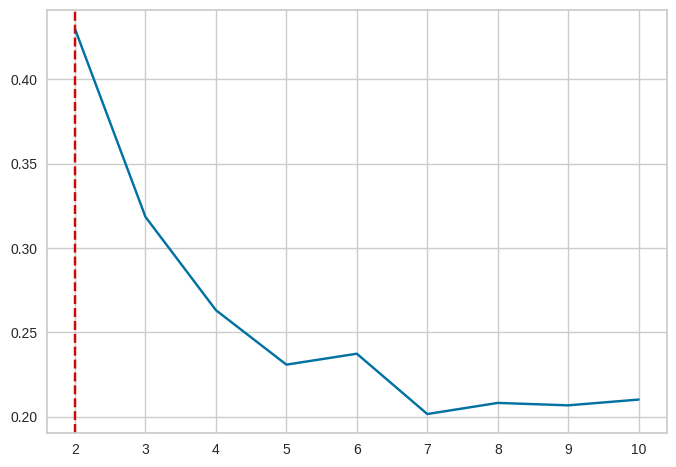

In [189]:
sns.lineplot(y=sil_scores,x=range(2,11))
plt.axvline(x = 2, color = 'r', linestyle = '--')

Based on the Silhoutte Score calculation method, Number of clusters should be equal to 2 as its Silhoutte Score is the highest. However, we wanted to confirm our approach and went ahead with Silhoutte Analysis based on Silhoutte Plots (below)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                                   
Silhoutte Score for Clusters = 2
                                                                   


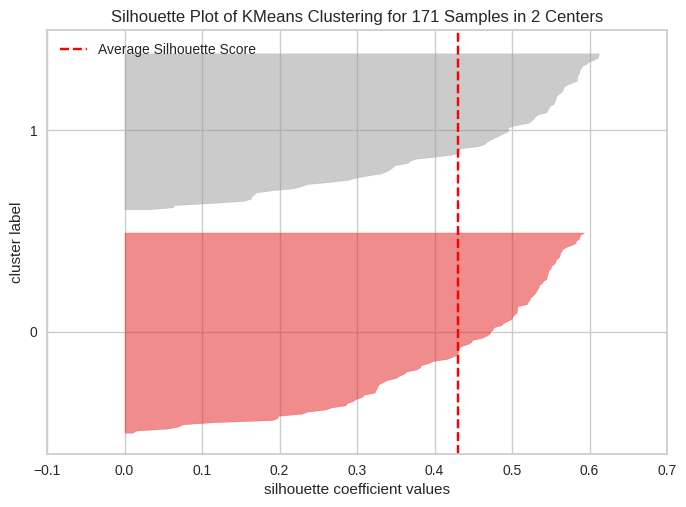

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                                   
Silhoutte Score for Clusters = 3
                                                                   


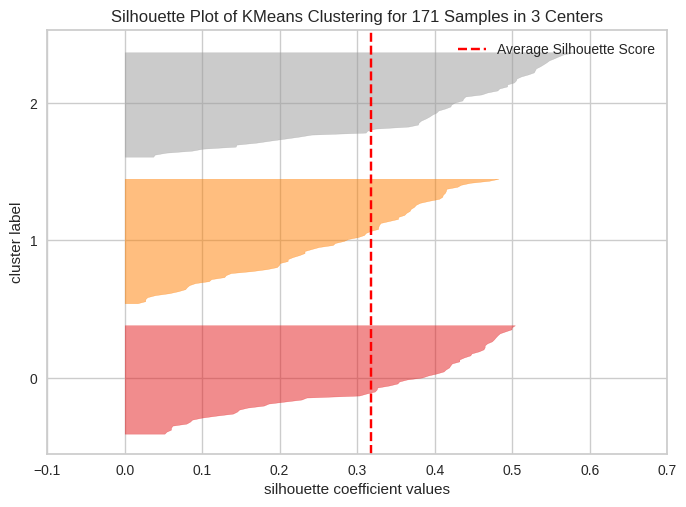

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                                                   
Silhoutte Score for Clusters = 4
                                                                   


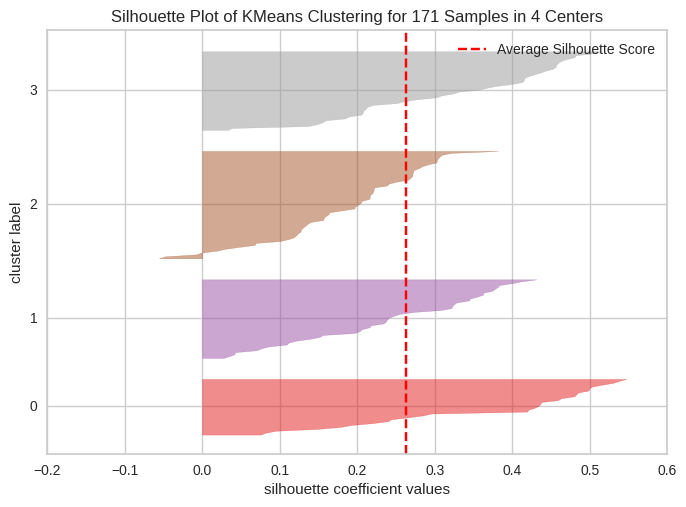

In [190]:
for i in range(2,5):
  world_km = KMeans(n_clusters = i, random_state=42)
  model_sil = SilhouetteVisualizer(world_km)
  model_sil.fit(world_df)
  print("                                                                   ")
  print("Silhoutte Score for Clusters = {}".format(i))
  print("==================================================================")
  print("                                                                   ")
  model_sil.show()


Based on the above Silhoutte Score Plots,

*   Cluster = 2 has both clusters having higher than average silhoutte score. The thickness of the cluster label = 0 is higher than cluster label =1
*   Cluster = 3 has almost equal cluster thickness
*   Cluster = 4 has varying cluster thickness for all clusters

Based on the above analysis, we are selecting num_cluster = 2 for KMeans Cluster algorithm

##### Fitting Kmeans algorithm on data

In [191]:
world_kmeans_cluster = KMeans(n_clusters=2,random_state = 42, max_iter=100)
world_kmeans_cluster.fit(world_df)
world_df['Pred_Class_Knn']= world_kmeans_cluster.fit_predict(world_df)

print(world_df.to_string())

                                Birth Rate  Business Tax Rate  Days to Start Business       GDP  Health Exp % GDP  Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  Internet Usage  Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  Population Urban  Pred_Class_Knn
Country                                                                                                                                                                                                                                                                                                                                            
Algeria                           0.404762           0.192319                0.034632  0.012804          0.158228           0.022332         0.169629               0.190909        0.111111                0.658537              0.666667                0.45         0.381471          0.539267        0.188034          0.650

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



##### **Hierarchial Clustering**



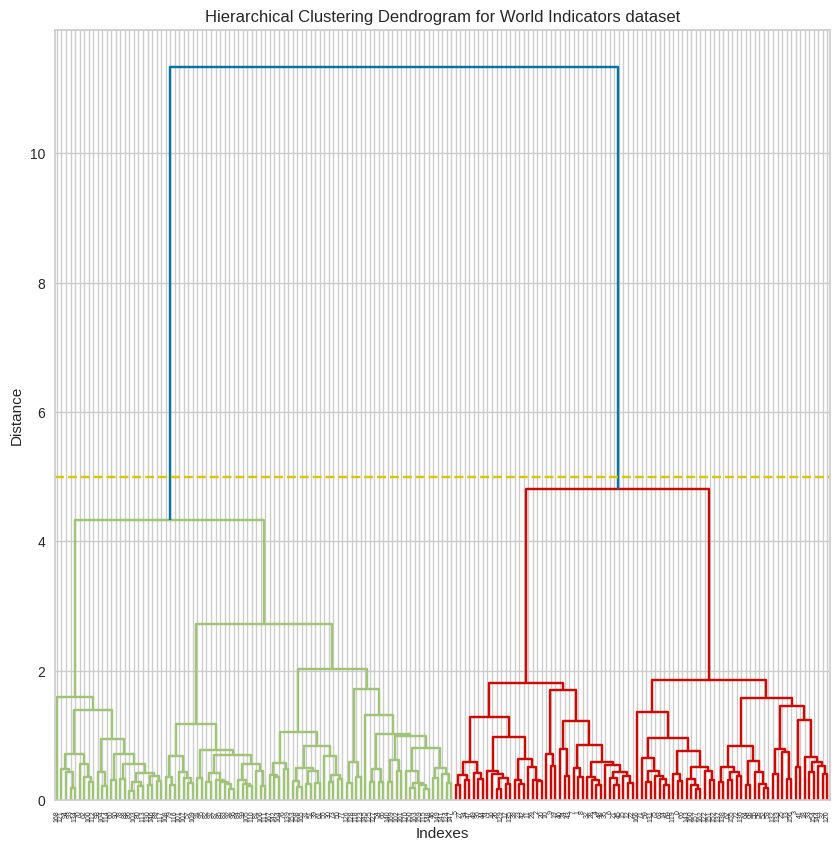

In [192]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram for World Indicators dataset')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(world_df.loc[:, world_df.columns != 'Pred_Class_Knn'], method='ward'))
plt.axhline(y = 5, color = 'y', linestyle = '--')
plt.show()

The Dendrogram representation shows Num_clusters = 2

In [193]:
hierarchial_data_worlddf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
world_df['Pred_Class_Hc'] = hierarchial_data_worlddf.fit_predict(world_df.loc[:, world_df.columns != 'Pred_Class_Knn'])
#print(world_df.to_string())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



##### Internal Validation

In [194]:
col_list = []
for col in world_df.columns:
  if col in ['Pred_Class_Knn', 'Pred_Class_Hc']:
    pass
  else:
    col_list.append(col)
col_list

['Birth Rate',
 'Business Tax Rate',
 'Days to Start Business',
 'GDP',
 'Health Exp % GDP',
 'Health Exp/Capita',
 'Hours to do Tax',
 'Infant Mortality Rate',
 'Internet Usage',
 'Life Expectancy Female',
 'Life Expectancy Male',
 'Mobile Phone Usage',
 'Population 0-14',
 'Population 15-64',
 'Population 65+',
 'Population Urban']

Task 2 (II) Internal Validation

In [195]:
world_df_knn_dist = pairwise_distances(world_df.loc[:,col_list])
dunn_kmeans = dunn(world_df_knn_dist,world_df.loc[:,'Pred_Class_Knn'])
print('Dun Index for Clustering performed by KMeans Algorithm: '+ str(round(dunn_kmeans,2)))
world_df_hc_dist = pairwise_distances(world_df.loc[:,col_list])
dunn_hc = dunn(world_df_hc_dist,world_df.loc[:,'Pred_Class_Hc'])
print('Dun Index for Clustering performed by Hierarchial Clustering Algorithm: '+ str(round(dunn_hc,2)))


Dun Index for Clustering performed by KMeans Algorithm: 0.12
Dun Index for Clustering performed by Hierarchial Clustering Algorithm: 0.14


In [196]:
print('CH Score for Clustering Perfomed by KMeans Algo is : '+ str(metrics.calinski_harabasz_score(world_df.loc[:,col_list], world_df.loc[:,'Pred_Class_Knn'])))
print('CH Score for Clustering Perfomed by Clustering Algo is: '+ str(metrics.calinski_harabasz_score(world_df.loc[:,col_list],world_df.loc[:,'Pred_Class_Hc'])))

CH Score for Clustering Perfomed by KMeans Algo is : 192.54525050508803
CH Score for Clustering Perfomed by Clustering Algo is: 184.87996192103543


In [197]:
print( 'Silhouette Coefficient for KMeans is : ' + str(metrics.silhouette_score(world_df.loc[:,col_list], world_df.loc[:,'Pred_Class_Knn'])))
print('Silhouette Coefficient for Hierarchial Clustering is : ' +  str(metrics.silhouette_score(world_df.loc[:,col_list], world_df.loc[:,'Pred_Class_Hc'])))


Silhouette Coefficient for KMeans is : 0.42987453131766545
Silhouette Coefficient for Hierarchial Clustering is : 0.4176400922367597


##### Task 2 (III) Reporting Best clustering solution


*   For Calinski Harabasz coefficient (CH),

        CH(Kmeans) > CH(Hierarchial)

*   For Dunn Index (DI),

        DI (Kmeans) < DI (Hierarchial)


*   For Silhouette Coefficient (SC),

        SC (Kmeans)> SC (Hierarchial)



Hence, KMeans with k=2 is a best algorithm for this dataset

In [198]:
world_df.reset_index(inplace=True, level=['Country'])


In [199]:
world_df

,Country,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Pred_Class_Knn,Pred_Class_Hc
0,Algeria,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,1,0
1,Angola,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,1,0
2,Benin,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,1,0
3,Botswana,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,1,0
4,Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Suriname,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077,0,0
167,Trinidad and Tobago,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000,0,1
168,United States,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340,0,1
169,Uruguay,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724,0,1


There are 2 groups within 'Pred_Class_Knn': 0, 1. The country's within each list is as under

In [200]:
print("Countries in Cluster with Class = 0 are :")
cluster_country_1 = world_df.loc[world_df['Pred_Class_Knn'] == 0,['Country','Pred_Class_Knn']]
cluster_country_1.reset_index(inplace= True, drop = True)
cluster_country_1.head()

Countries in Cluster with Class = 0 are :


,Country,Pred_Class_Knn
0,"Egypt, Arab Rep.",0
1,Mauritius,0
2,Morocco,0
3,Seychelles,0
4,Tunisia,0


In [201]:
print("Countries in Cluster with Class = 1 are :")
cluster_country_2 = world_df.loc[world_df['Pred_Class_Knn'] == 1,['Country','Pred_Class_Knn']]
cluster_country_2.reset_index(inplace= True, drop = True)
cluster_country_2.head()

Countries in Cluster with Class = 1 are :


,Country,Pred_Class_Knn
0,Algeria,1
1,Angola,1
2,Benin,1
3,Botswana,1
4,Burkina Faso,1


##### Task 2 (4) Generate three different scatter plots of your choice and color the data points according to the group

In [202]:
world_data_df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.018,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
167,0.015,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
168,0.013,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
169,0.015,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [203]:
world_data_df['KNN_Class'] = world_df['Pred_Class_Knn']
infant_health = px.scatter(world_data_df, y='Health Exp/Capita', x='Infant Mortality Rate', color='KNN_Class', width = 800, height = 500,
                                      title = 'Health Exp/Capita Vs Infant Mortality Rate')
infant_health.show()

This plot shows that Countries in Class (0)  Have higher Health Expenditure per Capita and lower Infant Mortality Rate. However, Countries in Class (1) have lower Health Expenditure Per Capita and have higher Infant Mortality rate. This graph also shows inverse relation of Health Expenditure Per Capita with Infant Mortality rate

In [204]:
life_Exp = px.scatter(world_data_df, y='Life Expectancy Female', x='Life Expectancy Male', color='KNN_Class', width = 800, height = 500,
                                      title = 'Life Expectancy Female Vs Male')
life_Exp.show()

This plot shows that countries in Class (0) have higher life expectancy be it male or female whereas countries in Class (1) have lower life expectancy for male and female comparitively (with class 0)

In [205]:
internet_usage = px.scatter(world_data_df, x='Mobile Phone Usage', y='Internet Usage', color='KNN_Class', width = 800, height = 500,
                                      title = 'Mobile Phone Usage Vs Internet Usage')
internet_usage.show()

This Plot shows the as phone usage increases, internet usage also increases. Comparing 2 classes, Class (0) is having more Mobile Usage and hence, more Internet Usage than Class (1)

In [206]:
pop_gdp = px.scatter(world_data_df, y='Population Urban', x='Birth Rate', color='KNN_Class', width = 800, height = 500,
                                      title = 'Population Urban Vs Birth rate')
pop_gdp.show()

This plot shows that all those countries which have higher Urban Population (Class 0) generally have a lower birth rate (<0.02)

### Formulaes used for this project are:

The silhouette coefficient is determined by the following expression:
s(i) = b(i) −a (i) / max{a(i),b(i)}

The Dunn Index Ratio should be maximized by:
DI m = (min1 δ(Ci,Cj ) / max1 ∆k)

The number of clusters that maximizes the CH value for M clusters:
CH = (SSB / (M-1) / SSE/(M))

Where SSE is some of squared errors within clusters and SSB is Group sum of squares

The accuracy is calculated in terms of positives and negatives-
Accuracy=TP+TN/TP+TN+FP+FN
where TP=True Positives,TN=True Negatives,FP=False Positives and FN=False
Negatives

The F1 Score is determined by

F1 Score=2*(Precision*Recall)/Precision+Recall

In [ ]:
! jupyter nbconvert --to html Project1_Group72.ipynb

[NbConvertApp] Converting notebook Project1_Group72.ipynb to html
[NbConvertApp] Writing 3964644 bytes to Project1_Group72.html
